In [4]:
import numpy as np # Used for numerical operations and array manipulations.
import pandas as pd # Used for data manipulation and analysis.
import os # Provides functions for interacting with the operating system.
import pickle # Allows for serialization and deserialization of Python objects.
import matplotlib.pyplot as plt # Used for data visualization.
import tensorflow as tf #  Deep learning framework for building and training machine learning models.
from PIL import Image

In [5]:
data_path = r"C:\Users\zenne\Downloads\Packet Images CNN\new_img_dataset"  # Path to the dataset
# List all folders in the dataset path
folders = os.listdir(data_path)

# Display unique resolutions in the dataset
print(f"Unique Resolutions are: \n{folders}")

Unique Resolutions are: 
['distcc_exec_backdoor2', 'vsftpd', 'mirai', 'netbios_ssn2', 'hydra_ftp2', 'smtp22', 'replayAttacks', 'vsftpd2', 'distcc_exec_backdoor', 'blackEnergy', 'unreallrcd', 'smtp', 'ruby_drb2', 'zeus', 'hydra_ssh2', 'netbios_ssn', 'ruby_drb', '0day', 'unreallrcd2', 'hydra_ssh', 'hydra_ftp']


In [6]:
# Count the number of unique resolutions
n_classes = len(folders)
print("Number of labels: {}".format(n_classes))

Number of labels: 21


In [7]:
# Count the number of images for each resolution
nums = {}
for res in folders:
    nums[res] = len(os.listdir(data_path +'/' + res))

# converting the nums dictionary to pandas dataframe passing index as resolution name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
distcc_exec_backdoor2,200
vsftpd,200
mirai,200
netbios_ssn2,200
hydra_ftp2,200
smtp22,200
replayAttacks,200
vsftpd2,200
distcc_exec_backdoor,200
blackEnergy,200


Text(0.5, 1.0, 'Images per each class of label')

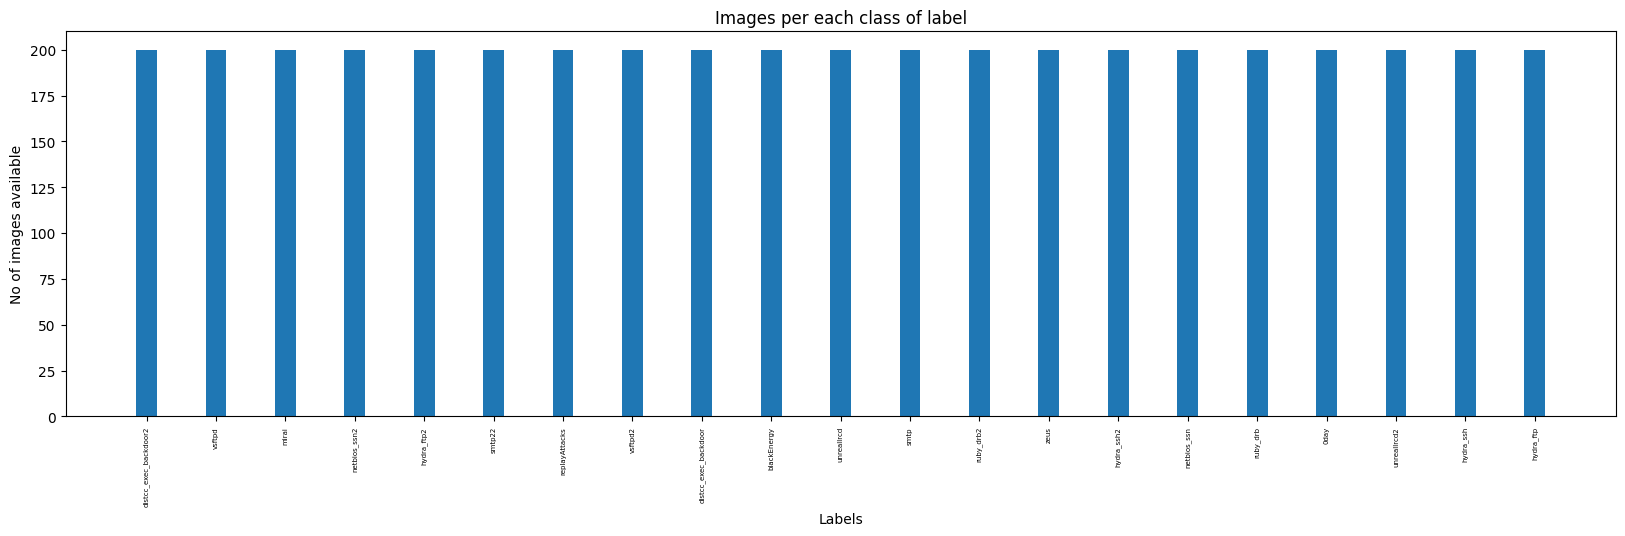

In [8]:
# Plotting number of images available for each class
index = [n for n in range(len(folders))]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Labels', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, folders, fontsize=5, rotation=90)
plt.title('Images per each class of label')

In [9]:
# Count the total number of images available for training
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 4200 images for training


In [10]:
IMG_SIZE = (224, 224)
WIDTH, HEIGHT = IMG_SIZE
DEPTH = 3
BATCH_SIZE = 32
VALID_SPLIT = .2

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=VALID_SPLIT, # Splitting data to 80% for training and 20% for validation
  subset="training",
  seed=123, # Seed is set for reproducibility.
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE
)

Found 4200 files belonging to 21 classes.
Using 3360 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=VALID_SPLIT,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE
)

Found 4200 files belonging to 21 classes.
Using 840 files for validation.


In [13]:
class_names = train_ds.class_names
n_classes = len(class_names)
print(class_names)

['0day', 'blackEnergy', 'distcc_exec_backdoor', 'distcc_exec_backdoor2', 'hydra_ftp', 'hydra_ftp2', 'hydra_ssh', 'hydra_ssh2', 'mirai', 'netbios_ssn', 'netbios_ssn2', 'replayAttacks', 'ruby_drb', 'ruby_drb2', 'smtp', 'smtp22', 'unreallrcd', 'unreallrcd2', 'vsftpd', 'vsftpd2', 'zeus']


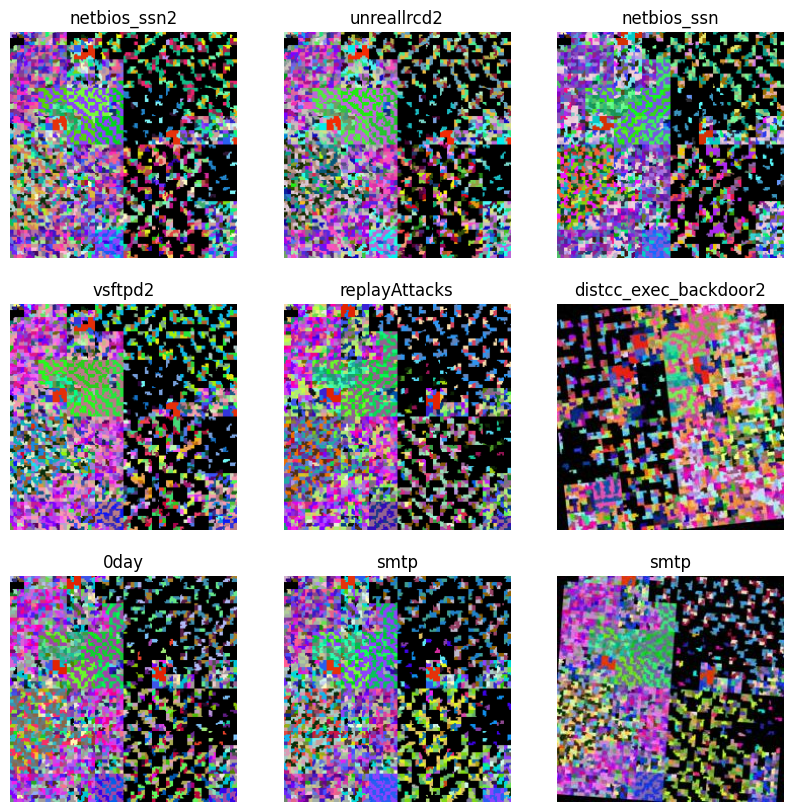

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


### Training Models

In [16]:
from keras.models import Model
from keras.optimizers import Adam
from keras.applications import (
  VGG16,
  VGG19,
  InceptionV3,
  MobileNetV3Large,
  EfficientNetV2L,
  ResNet50V2,
  DenseNet201,
  Xception
)
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.layers import Input

In [17]:
def CustomCNN(input_shape, weights="", include_top=False, num_classes=n_classes):
  input = Input(shape=input_shape)
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(input)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(64, activation='relu')(x)
  output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

  model = Model(input, output)

  return model

In [18]:
def AlexNet(input_shape, weights="", include_top=False, num_classes=n_classes):
  input = Input(shape=input_shape)
  x = tf.keras.layers.Conv2D(96, (11, 11), strides=4, activation='relu')(input)
  x = tf.keras.layers.MaxPooling2D((3, 3), strides=2)(x)
  x = tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D((3, 3), strides=2)(x)
  x = tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu')(x)
  x = tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu')(x)
  x = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D((3, 3), strides=2)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(4096, activation='relu')(x)
  x = tf.keras.layers.Dense(4096, activation='relu')(x)
  output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

  model = Model(input, output)

  return model

In [19]:
class CustomTrainable():
    def __init__(self):
        self.architectures = {
            "Custom": CustomCNN,
            "AlexNet": AlexNet,
            "VGG16": VGG16,
            "VGG19": VGG19,
            "GoogLeNet": InceptionV3,
            "MobileNet": MobileNetV3Large,
            "EfficientNet": EfficientNetV2L,
            "ResNet": ResNet50V2,
            "DenseNet": DenseNet201,
            "Xception": Xception,

        }

    def _setup(self, config):
        architecture = config['architecture']
        if architecture not in self.architectures:
            raise ValueError(f"Invalid architecture specified.")

        self.model = self.build_model(config)
        self.batch_size = config['batch_size']
        self.epochs = config["epochs"]

    def _save(self, checkpoint_dir, config):
        self.model.save(f"{checkpoint_dir}/{config['architecture']}.model.keras")

    def _restore(self, checkpoint_path, weights=True, config=None):
        if not weights:
            return tf.keras.models.load_model(f"{checkpoint_path}/{config['architecture']}.model.keras")
        return self.model.load_weights(f"{checkpoint_path}/{config['architecture']}.weights.h5")

    def build_model(self, config) -> Model:
        architecture = config['architecture']
        if architecture not in self.architectures:
            raise ValueError(f"Invalid architecture specified.")

        base_model = self.architectures[architecture](weights='imagenet', include_top=False, input_shape=(WIDTH, HEIGHT, DEPTH))

        if architecture != "Custom":
            for layer in base_model.layers:
                layer.trainable = False

        if architecture in ["Custom", "AlexNet"]:
            return base_model

        x = tf.keras.layers.Flatten()(base_model.output)
        x = tf.keras.layers.Dense(256, activation='relu')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(0.5)(x)
        output = tf.keras.layers.Dense(n_classes, activation='softmax', name="outputs")(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=output)
        return model

    def compile_model(self):
        optimizer = Adam(learning_rate=1e-3)  # You can adjust the learning rate
        self.model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#### a. Custom CNN Model

In [20]:
config = {
    "architecture": "Custom",
    "batch_size": BATCH_SIZE,
    "epochs": 10
}

# Create an instance of the CustomTrainable class
custom_trainable = CustomTrainable()

# Setup the model
custom_trainable._setup(config)

# Compile the model
custom_trainable.compile_model()

# Define a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='./model_checkpoints/Custom/{epoch:02d}-{val_accuracy:.2f}.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)


# Train the model
history = custom_trainable.model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=config["epochs"],
  callbacks=[checkpoint_callback, lr_scheduler]
)

# Save the model
custom_trainable._save('./', config)

Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 53.0219 - accuracy: 0.5813
Epoch 1: val_accuracy improved from -inf to 0.75238, saving model to ./model_checkpoints/Custom/01-0.75.weights.h5
105/105 [==============================] - 24s 165ms/step - loss: 53.0219 - accuracy: 0.5813 - val_loss: 0.7945 - val_accuracy: 0.7524 - lr: 0.0010
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.4852 - accuracy: 0.8458
Epoch 2: val_accuracy improved from 0.75238 to 0.80595, saving model to ./model_checkpoints/Custom/02-0.81.weights.h5
105/105 [==============================] - 22s 205ms/step - loss: 0.4852 - accuracy: 0.8458 - val_loss: 0.8266 - val_accuracy: 0.8060 - lr: 9.0000e-04
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.3135 - accuracy: 0.8961
Epoch 3: val_accuracy did not improve from 0.80595
105/105 [==============================] - 21s 196ms/step - loss: 0.3135 - accuracy: 0.8961 - val_loss: 0.8534 - val_accuracy: 0

In [21]:
import matplotlib.pyplot as plt


def plot_training_history(history, model_name):
    # Plot training and validation loss
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss ({model_name} Model)')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 3, 2)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy ({model_name} Model)')
    plt.legend()

    # Learning Rate
    plt.subplot(1, 3, 3)
    plt.plot(history['lr'], label='Learning Rate', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.title(f'Learning Rate ({model_name} Model)')
    plt.legend()

    plt.tight_layout()
    plt.show()

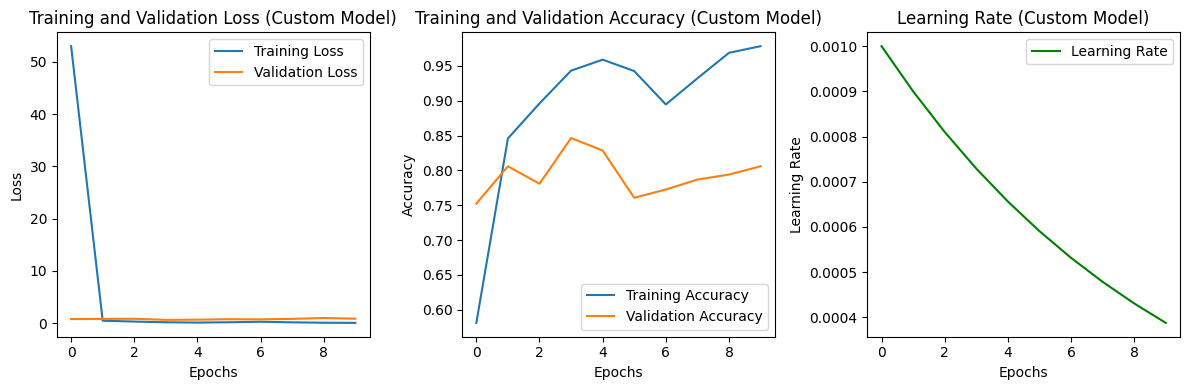

In [22]:
plot_training_history(history.history, 'Custom')

#### b. VGG16

In [23]:
config = {
    "architecture": "VGG16",
    "batch_size": BATCH_SIZE,
    "epochs": 10
}

# Create an instance of the CustomTrainable class
vgg16_trainable = CustomTrainable()

# Setup the model
vgg16_trainable._setup(config)

# Compile the model
vgg16_trainable.compile_model()

# Define a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='./model_checkpoints/VGG16/{epoch:02d}-{val_accuracy:.2f}.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)


# Train the model
vgg16_history = vgg16_trainable.model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=config["epochs"],
  callbacks=[checkpoint_callback, lr_scheduler]
)

# Save the model
vgg16_trainable._save('./', config)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 1.3150 - accuracy: 0.6155
Epoch 1: val_accuracy improved from -inf to 0.74286, saving model to ./model_checkpoints/VGG16/01-0.74.weights.h5
105/105 [==============================] - 34s 214ms/step - loss: 1.3150 - accuracy: 0.6155 - val_loss: 0.8280 - val_accuracy: 0.7429 - lr: 0.0010
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.4904 - accuracy: 0.8417
Epoch 2: val_accuracy improved from 0.74286 to 0.82381, saving model to ./model_checkpoints/VGG16/02-0.82.weights.h5
105/105 [==============================] - 22s 197ms/step - loss: 0.4904 - accuracy: 0.8417 - val_loss: 0.5261 - val_accuracy: 0.8238 - lr: 9.0000e-04
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.3095 - accuracy: 0.9077
Epoch 3: val_accuracy improved from 0.82381 to 0.82976, saving model to ./model_checkpoints/VGG16/03-0.83.weights.h5
1

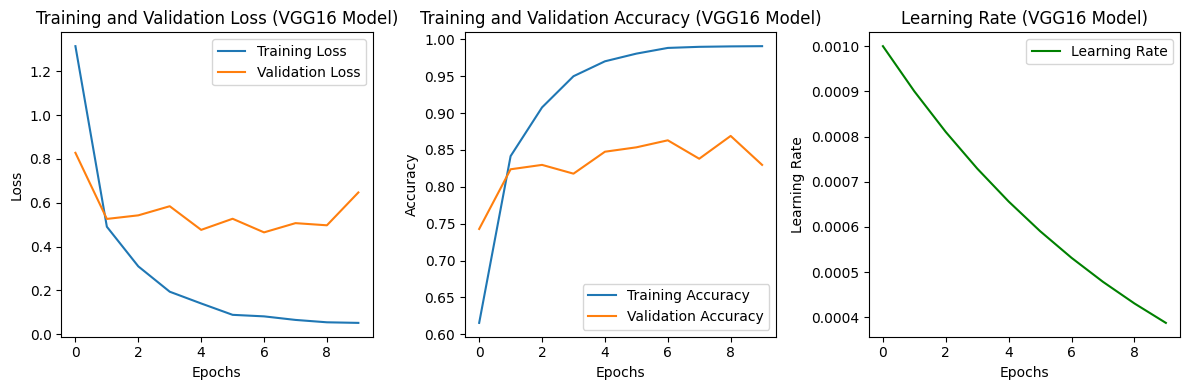

In [24]:
plot_training_history(vgg16_history.history, 'VGG16')

#### c. VGG19

In [25]:
config = {
    "architecture": "VGG19",
    "batch_size": BATCH_SIZE,
    "epochs": 10
}

# Create an instance of the CustomTrainable class
vgg19_trainable = CustomTrainable()

# Setup the model
vgg19_trainable._setup(config)

# Compile the model
vgg19_trainable.compile_model()

# Define a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='./model_checkpoints/VGG19/{epoch:02d}-{val_accuracy:.2f}.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)


# Train the model
vgg19_history = vgg19_trainable.model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=config["epochs"],
  callbacks=[checkpoint_callback, lr_scheduler]
)

# Save the model
vgg19_trainable._save('./', config)

80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 1.3257 - accuracy: 0.6134
Epoch 1: val_accuracy improved from -inf to 0.76071, saving model to ./model_checkpoints/VGG19/01-0.76.weights.h5
105/105 [==============================] - 31s 271ms/step - loss: 1.3257 - accuracy: 0.6134 - val_loss: 0.8143 - val_accuracy: 0.7607 - lr: 0.0010
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.5106 - accuracy: 0.8417
Epoch 2: val_accuracy improved from 0.76071 to 0.80119, saving model to ./model_checkpoints/VGG19/02-0.80.weights.h5
105/105 [==============================] - 25s 231ms/step - loss: 0.5106 - accuracy: 0.8417 - val_loss: 0.6340 - val_accuracy: 0.8012 - lr: 9.0000e-04
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.3108 - accuracy: 0.9092
Epoch 3: val_accuracy improved from 0.80119 to 0.80357, saving model to ./model_checkpoints/VGG19/03-0.80.weights.h5
1

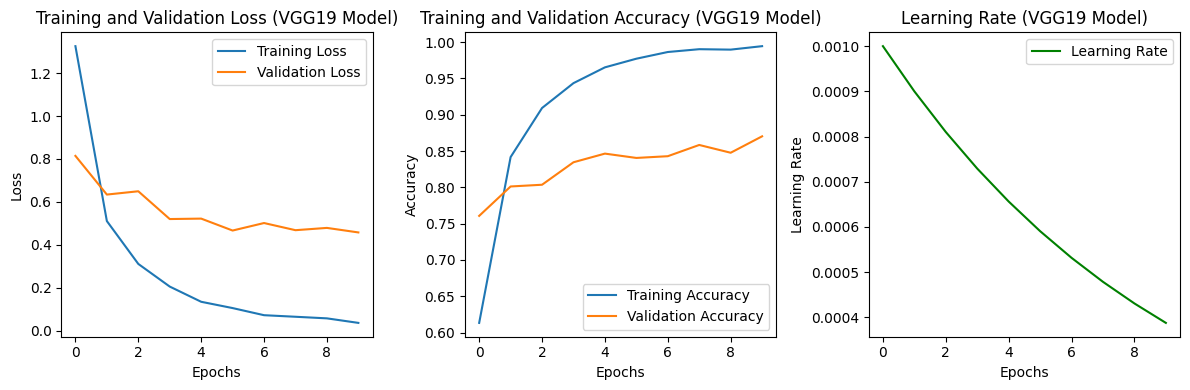

In [26]:
plot_training_history(vgg19_history.history, 'VGG19')

##### e. DenseNet

In [28]:
config = {
    "architecture": "DenseNet",
    "batch_size": BATCH_SIZE,
    "epochs": 10
}

# Create an instance of the CustomTrainable class
densenet_trainable = CustomTrainable()

# Setup the model
densenet_trainable._setup(config)

# Compile the model
densenet_trainable.compile_model()

# Define a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='./model_checkpoints/DenseNet/{epoch:02d}-{val_accuracy:.2f}.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)


# Train the model
densenet_history = densenet_trainable.model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=config["epochs"],
  callbacks=[checkpoint_callback, lr_scheduler]
)

# Save the model
densenet_trainable._save('./', config)

74836368/74836368 [==============================] - 1s 0us/step
Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 2.0668 - accuracy: 0.3699
Epoch 1: val_accuracy improved from -inf to 0.28452, saving model to ./model_checkpoints/DenseNet/01-0.28.weights.h5
105/105 [==============================] - 65s 439ms/step - loss: 2.0668 - accuracy: 0.3699 - val_loss: 4.2158 - val_accuracy: 0.2845 - lr: 0.0010
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 1.1061 - accuracy: 0.6571
Epoch 2: val_accuracy improved from 0.28452 to 0.66190, saving model to ./model_checkpoints/DenseNet/02-0.66.weights.h5
105/105 [==============================] - 31s 281ms/step - loss: 1.1061 - accuracy: 0.6571 - val_loss: 1.0768 - val_accuracy: 0.6619 - lr: 9.0000e-04
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.7870 - accuracy: 0.7595
Epoch 3: val_accuracy improved from 0.66190 to 0.74286, saving model to ./model_checkpoints/DenseNet/03-0.74.wei

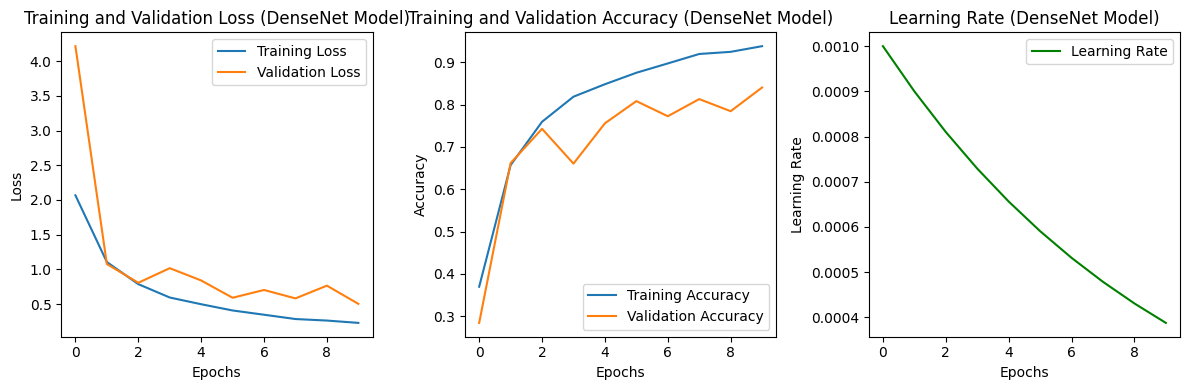

In [29]:
plot_training_history(densenet_history.history, 'DenseNet')

#### f. Xception

In [30]:
config = {
    "architecture": "Xception",
    "batch_size": BATCH_SIZE,
    "epochs": 10
}

# Create an instance of the CustomTrainable class
xception_trainable = CustomTrainable()

# Setup the model
xception_trainable._setup(config)

# Compile the model
xception_trainable.compile_model()

# Define a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='./model_checkpoints/Xception/{epoch:02d}-{val_accuracy:.2f}.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)


# Train the model
xception_history = xception_trainable.model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=config["epochs"],
  callbacks=[checkpoint_callback, lr_scheduler]
)

# Save the model
xception_trainable._save('./', config)

83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 2.3117 - accuracy: 0.3393
Epoch 1: val_accuracy improved from -inf to 0.40000, saving model to ./model_checkpoints/Xception/01-0.40.weights.h5
105/105 [==============================] - 33s 238ms/step - loss: 2.3117 - accuracy: 0.3393 - val_loss: 1.7807 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 1.3983 - accuracy: 0.5705
Epoch 2: val_accuracy improved from 0.40000 to 0.63810, saving model to ./model_checkpoints/Xception/02-0.64.weights.h5
105/105 [==============================] - 24s 222ms/step - loss: 1.3983 - accuracy: 0.5705 - val_loss: 1.1383 - val_accuracy: 0.6381 - lr: 9.0000e-04
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 1.0710 - accuracy: 0.6723
Epoch 3: val_accuracy improved from 0.63810 to 0.65952, saving model to ./model_checkpoints/Xception/03-0.66.wei

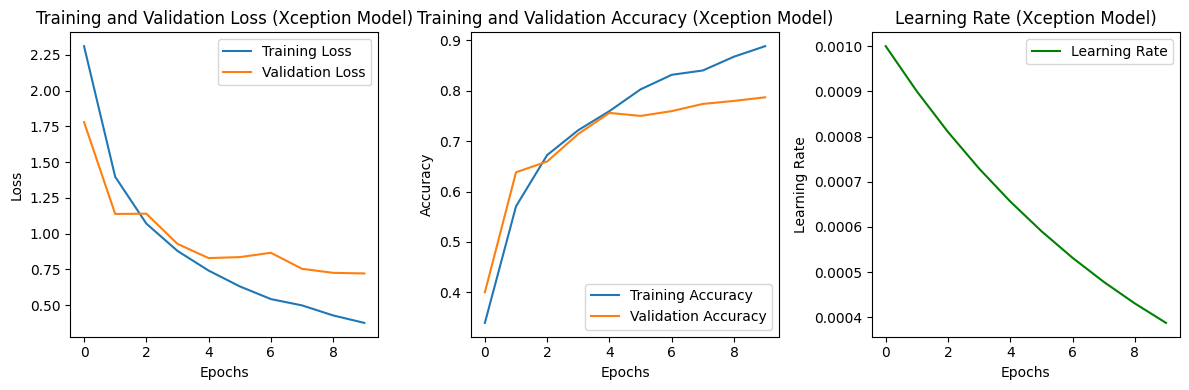

In [31]:
plot_training_history(xception_history.history, 'Xception')

#### g. MobileNet

In [32]:
config = {
    "architecture": "MobileNet",
    "batch_size": BATCH_SIZE,
    "epochs": 10
}

# Create an instance of the CustomTrainable class
mobilenet_trainable = CustomTrainable()

# Setup the model
mobilenet_trainable._setup(config)

# Compile the model
mobilenet_trainable.compile_model()

# Define a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='./model_checkpoints/MobileNet/{epoch:02d}-{val_accuracy:.2f}.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)


# Train the model
mobilenet_history = mobilenet_trainable.model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=config["epochs"],
  callbacks=[checkpoint_callback, lr_scheduler]
)

# Save the model
mobilenet_trainable._save('./', config)

12683000/12683000 [==============================] - 0s 0us/step
Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 1.3037 - accuracy: 0.6205
Epoch 1: val_accuracy improved from -inf to 0.75714, saving model to ./model_checkpoints/MobileNet/01-0.76.weights.h5
105/105 [==============================] - 31s 218ms/step - loss: 1.3037 - accuracy: 0.6205 - val_loss: 0.7201 - val_accuracy: 0.7571 - lr: 0.0010
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.4994 - accuracy: 0.8304
Epoch 2: val_accuracy improved from 0.75714 to 0.81905, saving model to ./model_checkpoints/MobileNet/02-0.82.weights.h5
105/105 [==============================] - 24s 216ms/step - loss: 0.4994 - accuracy: 0.8304 - val_loss: 0.5098 - val_accuracy: 0.8190 - lr: 9.0000e-04
Epoch 3/10
104/105 [============================>.] - ETA: 0s - loss: 0.2994 - accuracy: 0.9066
Epoch 3: val_accuracy improved from 0.81905 to 0.84048, saving model to ./model_checkpoints/MobileNet/03-0.84.

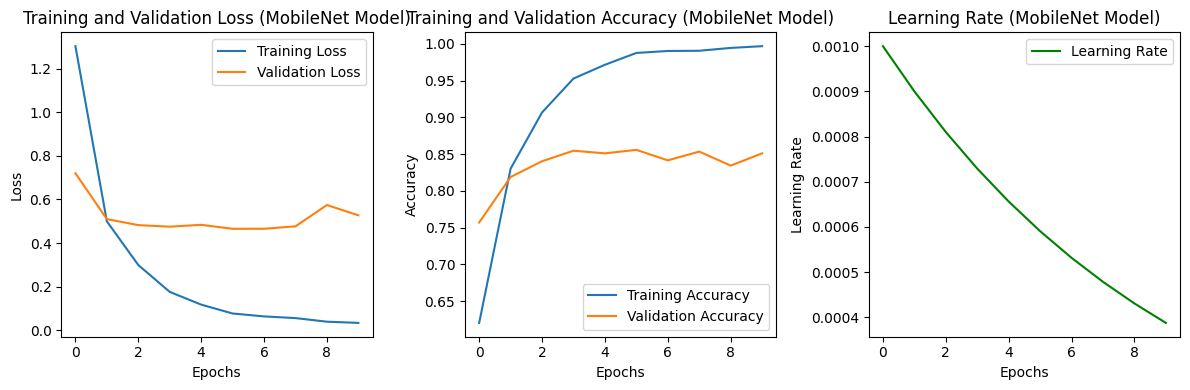

In [33]:
plot_training_history(mobilenet_history.history, 'MobileNet')

#### h. ResNet

In [34]:
config = {
    "architecture": "ResNet",
    "batch_size": BATCH_SIZE,
    "epochs": 10
}

# Create an instance of the CustomTrainable class
resnet_trainable = CustomTrainable()

# Setup the model
resnet_trainable._setup(config)

# Compile the model
resnet_trainable.compile_model()

# Define a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='./model_checkpoints/ResNet/{epoch:02d}-{val_accuracy:.2f}.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)


# Train the model
resnet_history = resnet_trainable.model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=config["epochs"],
  callbacks=[checkpoint_callback, lr_scheduler]
)

# Save the model
resnet_trainable._save('./', config)

94668760/94668760 [==============================] - 1s 0us/step
Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 1.7162 - accuracy: 0.5018
Epoch 1: val_accuracy improved from -inf to 0.38690, saving model to ./model_checkpoints/ResNet/01-0.39.weights.h5
105/105 [==============================] - 34s 251ms/step - loss: 1.7162 - accuracy: 0.5018 - val_loss: 2.3522 - val_accuracy: 0.3869 - lr: 0.0010
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.8106 - accuracy: 0.7500
Epoch 2: val_accuracy improved from 0.38690 to 0.77500, saving model to ./model_checkpoints/ResNet/02-0.77.weights.h5
105/105 [==============================] - 25s 233ms/step - loss: 0.8106 - accuracy: 0.7500 - val_loss: 0.7320 - val_accuracy: 0.7750 - lr: 9.0000e-04
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.5695 - accuracy: 0.8318
Epoch 3: val_accuracy did not improve from 0.77500
105/105 [==============================] - 19s 170ms/step - loss:

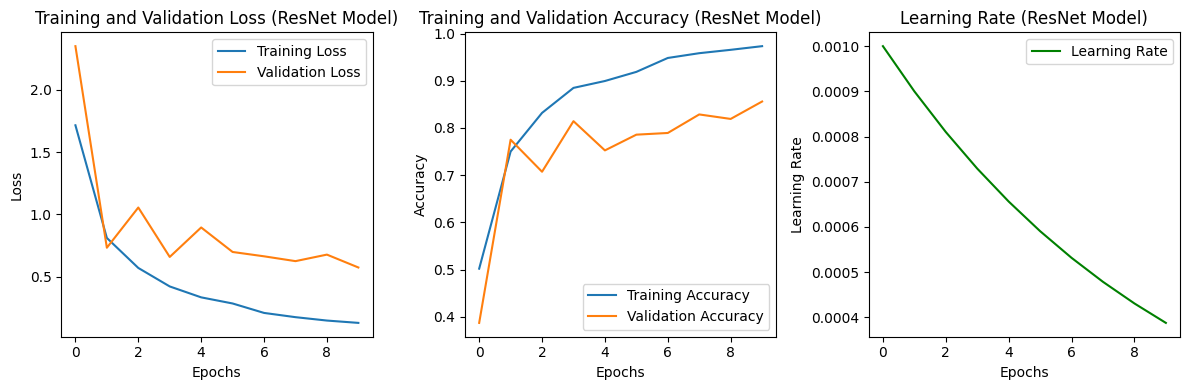

In [35]:
plot_training_history(resnet_history.history, 'ResNet')

### Evaluation and comparing models

In [36]:
import matplotlib.pyplot as plt
import numpy as np

models_and_dataset = [
    ('Custom', custom_trainable.model, val_ds),
    ('VGG16', vgg16_trainable.model, val_ds),
    ('VGG19', vgg19_trainable.model, val_ds),
    ('DenseNet', densenet_trainable.model, val_ds),
    ('Xception', xception_trainable.model, val_ds),
    ('MobileNet', mobilenet_trainable.model, val_ds),
    ('ResNet', resnet_trainable.model, val_ds)
]

def evaluate(models_and_datasets):
    accuracies = []
    errors = []

    for name, model, val_dataset in models_and_datasets:
        print(f'{name} Model ...')
        # Evaluate the model on the test dataset
        results = model.evaluate(val_dataset)

        # Save accuracy and error
        accuracy = round(results[1] * 100, 2)
        error = round(results[0], 2)

        accuracies.append(accuracy)
        errors.append(error)
        print()
    return errors, accuracies

errors, accuracies = evaluate(models_and_dataset)

Custom Model ...
27/27 [==============================] - 3s 79ms/step - loss: 0.8659 - accuracy: 0.8060

VGG16 Model ...
27/27 [==============================] - 5s 160ms/step - loss: 0.6470 - accuracy: 0.8298

VGG19 Model ...
27/27 [==============================] - 5s 157ms/step - loss: 0.4576 - accuracy: 0.8702

DenseNet Model ...
27/27 [==============================] - 6s 153ms/step - loss: 0.5034 - accuracy: 0.8405

Xception Model ...
27/27 [==============================] - 5s 137ms/step - loss: 0.7223 - accuracy: 0.7869

MobileNet Model ...
27/27 [==============================] - 4s 106ms/step - loss: 0.5272 - accuracy: 0.8512

ResNet Model ...
27/27 [==============================] - 4s 111ms/step - loss: 0.5733 - accuracy: 0.8560



In [38]:
def plot_acc_err():
  models = ("Custom", "VGG16", "VGG19", "DenseNet", "Xception", "MobileNet", "ResNet")
  errors_accuracies = {
      'Error': errors,
      'Accuracy': accuracies,
  }

  x = np.arange(len(models))  # the label locations
  width = 0.25  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(layout='constrained')

  for attribute, measurement in errors_accuracies.items():
      offset = width * multiplier
      color = 'red' if attribute == 'Error' else 'green'
      rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
      ax.bar_label(rects, padding=3)
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_title('Error and Accuracy by Model')
  ax.set_xticks(x + width/2)
  ax.set_xticklabels(models)
  ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Metrics', title_fontsize='12')
  ax.set_ylim(0, 100)

  plt.show()

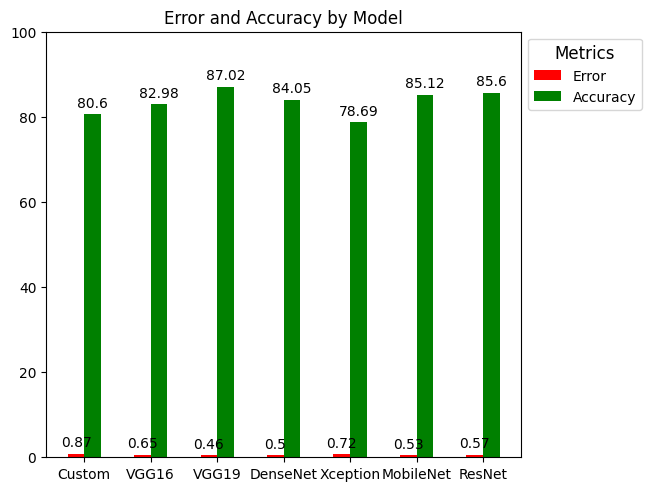

In [39]:
plot_acc_err()